In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in the data from hw3_csv 

In [2]:
filename = "hw3.csv"

In [3]:
df=pd.read_csv(filename)

In [4]:
df.head(10)

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
5,2021-12-08 12:00:00,3.8405,3.8789,3.7900,3.8392,3.788895e+05,NaN,CRV,ETH
6,2021-12-04 07:00:00,188.6880,196.4860,185.2630,190.8720,1.041406e+04,NaN,AAVE,ETH
7,2021-12-05 02:00:00,1.0015,1.0016,1.0012,1.0013,3.398077e+06,NaN,USDT,USDT
8,2021-12-09 10:00:00,1.0009,1.0010,1.0008,1.0009,7.236563e+06,NaN,USDT,USDT
9,2021-12-03 23:00:00,20.0490,20.1703,19.9061,19.9120,3.884822e+04,NaN,UNI,ETH


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


It looks like there are some nulls in high, low and close. For volume USD, all its values are unfilled. 

In [6]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
SOL                                   318
CRV                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">AAVE</span>     16
<span name="tokenName">SOL</span>      16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

We need to clean the token name as well 

In [7]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


There could be some outlier numbers. More graphs would be needed for determination. 

Data Cleaning: 
1. Drop duplicated rows, if there is any
2. Fill in the nan values 
3. Clean the token name 
    

In [8]:
df.duplicated().sum()

307

In [9]:
df = df.drop_duplicates() 

In [10]:
df['token'].value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
ETH                                   270
UNI                                   270
<span name="tokenName">ETH</span>      25
<span name="tokenName">UNI</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

Replace the span tag with the actual token name

In [11]:
tokens=['COMP', 'BTC','SOL','AAVE','CRV','USDT','ETH','UNI']
for token in tokens:
    df['token'] = df['token'].str.replace(f'<span name="tokenName">{token}</span>', token)

In [12]:
df['token'].value_counts()

ETH     295
UNI     295
USDT    295
BTC     295
AAVE    295
CRV     295
COMP    295
SOL     295
Name: token, dtype: int64

Here I decided to assign open values to missing high and low data, as open values are all available. Then I assigned the mean of open and low to missing close values.

In [13]:
df.loc[df['high'].isnull(),'high'] = df.loc[df['high'].isnull(), 'open']
df.loc[df['low'].isnull(),'low']=df.loc[df['low'].isnull(), 'open']

In [14]:
df.loc[df['close'].isnull(),'close']= 0.5* (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2360 non-null   object 
 1   open       2360 non-null   float64
 2   high       2360 non-null   float64
 3   low        2360 non-null   float64
 4   close      2360 non-null   float64
 5   volume     2360 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2360 non-null   object 
 8   chain      2360 non-null   object 
dtypes: float64(6), object(3)
memory usage: 184.4+ KB


In [16]:
df['volumeUSD']=df['close']*df['volume']

Use the graph to check the volumeUSD distribution for each token, to make sure there is no outlier 

In [17]:
tokens_in_df = df.token.unique()

In [19]:
import math 

In [20]:
df.set_index('ts', inplace=True)

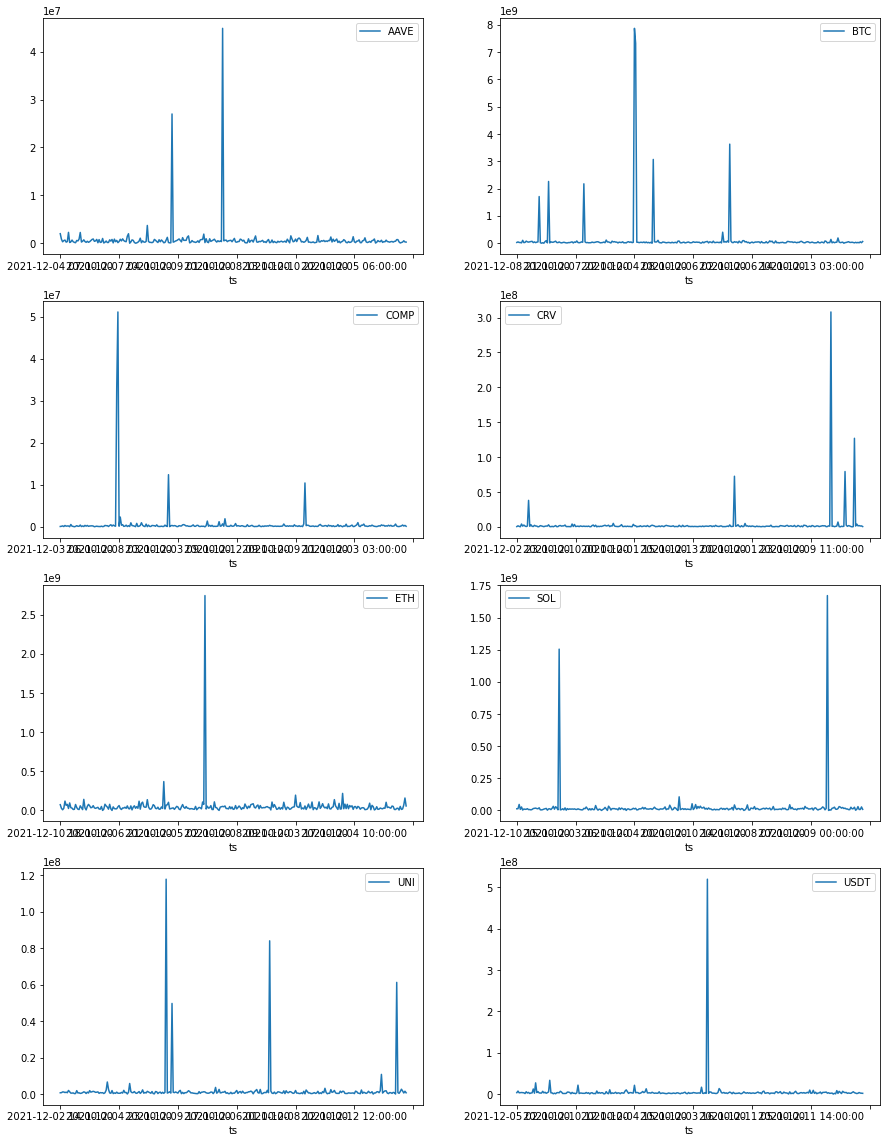

In [21]:
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'volumeUSD']].groupby('token'):
    df_token['volumeUSD'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

According to the graphs, there are outliers in each case. I replaced close price where close/open > 2

In [22]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

In [23]:
df['volumeUSD']=df['close']*df['volume']

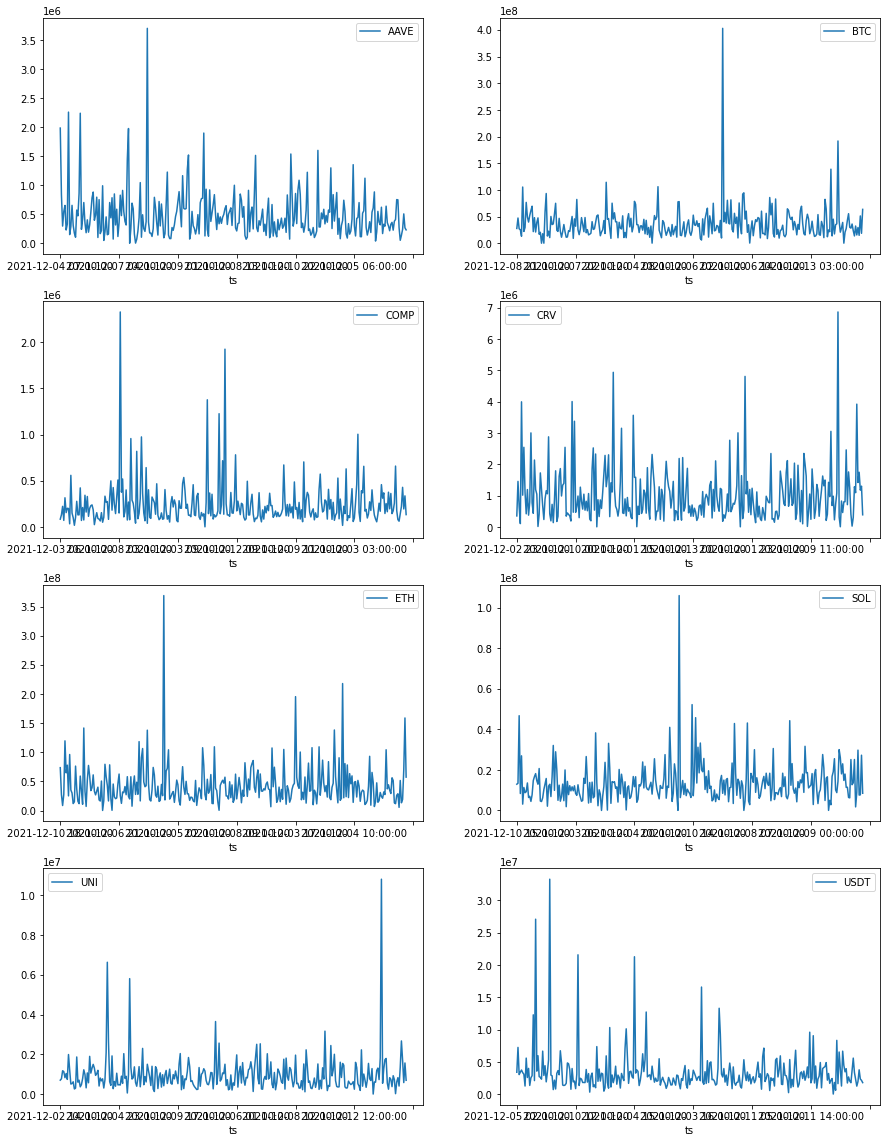

In [24]:
fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'volumeUSD']].groupby('token'):
    df_token['volumeUSD'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

There are still some small spikes, but overall graphs look good.

In [25]:
df.groupby('chain')['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
BTC,1.085510e+10
ETH,1.355585e+10
SOL,4.011000e+09
USDT,1.005306e+09
